<table style="width:98%; border: 1px solid DarkGoldenRod; border-collapse: collapse;">
  <tr style="background-color:#FFFFFF">
    <td width ="59%">
        <h1 style="font-size:3vw;color:#A00000;text-align:center">
        Autonomous Soil Exploration System using Artificial Curiosity
        </h1>
        <h1 style="font-size:2vw;color:#A00000;text-align:center">
        <font style="font-family:Snell Roundhand, cursive;color:darkgreen">
            2D Physics Engine Simulations
        </font>
        </h1>
        <h1 style="font-size:1.2vw;color:#A00000;text-align:center">
        Prof. Goren Gordon, Philippe Artsztein
        </h1>
    </td>
    <td width ="39%"><img src="./MyLogo.jpg" width="80%" height="80%" style="float:left;vertical-align:bottom;margin: 20px 20px"></td>
  </tr>
</table>

In [1]:
import General_Functions_v3 as gf
gf_Ver= gf.var()
import sys
Python_Ver= (str(sys.version_info.major)+"."
            +str(sys.version_info.major)+"."
            +str(sys.version_info.micro))
gf.Print_1H('Written Python Version =  3.3.12')
gf.Print_1H_1V('Current Python Version =', Python_Ver)

import numpy as np
import math
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output


ᐅ General Functions Version =  3.0
ᐅ Written Python Version =  3.3.12 
ᐅ Current Python Version =  3.3.12


<div class="alert alert-danger">
Here we present several 2D physics engine simulations,<br>
of groundwater pollution tracking, base on differen conceptual models.<br>
For more theoretical knowledge, please look at:<br> 
&emsp;2D analytical pollution diffusion synthetic field generator,<br>
&emsp;<a href="http://rpdata.caltech.edu/courses/aph162/2007/Protocols/diffusion.pdf">Diffusion of Solid Particles Confined in a Viscous Fluid</a><br>
and<br>
&emsp;2D finite difference diffusion synthetic field generator,<br>
&emsp;<a href="http://bb">bbb</a><br>
and<br>
&emsp;2D analytical advection synthetic field generator,<br>
&emsp;<a href="http://cc">ccc</a><br>
and<br>
&emsp;2D finite difference advectionsynthetic field generator,<br>
&emsp;<a href="http://dd">ddd</a><br>
and<br>
&emsp;2D direct diffusion-advection synthetic field generator,<br>
&emsp;<a href="http://ee">eee</a><br>
and<br>
&emsp;2D finite difference diffusion-advection synthetic field generator,<br>
&emsp;<a href="http://ff">fff</a><br>
and<br>
<br>
<u>The physics engine base on these conceptual models:</u><br>
&emsp;2D analytical pollution diffusion synthetic field generator<br>
&emsp;2D finite difference diffusion synthetic field generator<br>
&emsp;2D analytical advection synthetic field generator<br>
&emsp;2D finite difference advectionsynthetic field generator<br>
&emsp;2D direct diffusion-advection synthetic field generator<br>
&emsp;2D finite difference diffusion-advection synthetic field generator<br>
</div>

<div class="pagebreak"> </div>

<div class="alert alert-success">
<b><u>FieldParameters</u></b><br>
is a parent class contains data structure of the field parameters.<br>
<br><b><u>Constructor Input</u></b><br>
&emsp;<u><i>XfieldMin, XfieldMax</i></u><br>
&emsp;&emsp;Minimum x value in field in x direction and Maximum x value in field in x direction.<br>
&emsp;<u><i>YfieldMin, YfieldMax</i></u><br>
&emsp;&emsp;Minimum y value in field in y direction and Maximum y value in field in y direction.<br>
&emsp;<u><i>Xsource, Ysource</i></u><br>
&emsp;&emsp;x location of the pollution source and y location of the pollution source.<br>
&emsp;<u><i>DiffusionCoefficient</i></u><br>
&emsp;&emsp;The amount of a pollution substance that diffuses across a unit area in 1s under the influence<br>
&emsp;&emsp;of a gradient of one unit<br>
&emsp;<u><i>Pollution</i></u><br>
&emsp;&emsp;The amount of a pollution<br>
&emsp;<u><i>DeltaTime</i></u><br>
&emsp;&emsp;Defines the interval time between sequenced calculated iteration.<br>
<br><b><u>Methods</u></b><br>
&emsp;<u><i>ChangeFieldArguments(...)</i></u><br>
&emsp;&emsp;Change one or more field parameters. The method receive a dictionary of arguments.<br>
&emsp;&emsp;Example:<br>
&emsp;&emsp;ChangeFieldArguments(Xsource=300.0,Pollution=900.0)<br>
&emsp;&emsp;will only change Xsource and Pollution value.<br>
&emsp;<u><i>ChangeDeltaTime(...)</i></u><br>
&emsp;&emsp;Change DeltaTime value.<br>
&emsp;<u><i>PrintInputData(...)</i></u><br>
&emsp;&emsp;Print all input parameters values.<br>
&emsp;<u><i>ChangeDeltaTime(...)</i></u><br>
&emsp;&emsp;Print main parameters values.
</div>

In [2]:
class FieldParameters:

    def __init__(self, XfieldMin, XfieldMax, YfieldMin, YfieldMax, 
            Xsource, Ysource, DiffusionCoefficient, Pollution, DeltaTime):
        # Create storage allocation for Variable and initial its values 
        self.XfieldMin           = XfieldMin
        self.XfieldMax           = XfieldMax 
        self.YfieldMin           = YfieldMin
        self.YfieldMax           = YfieldMax 
        self.Xsource             = Xsource 
        self.Ysource             = Ysource
        self.DiffusionCoefficient= DiffusionCoefficient 
        self.Pollution           = Pollution
        self.DeltaTime           = DeltaTime
        self.MergeDiffusionTime  = DiffusionCoefficient*DeltaTime

    def ChangeFieldArguments(self, **Arguments):
        for iii in Arguments:
            if(iii=='XfieldMin'):
                self.XfieldMin= Arguments[iii]  
            if(iii=='XfieldMax'):
                self.XfieldMax= Arguments[iii] 
            if(iii=='YfieldMin'):
                self.YfieldMin= Arguments[iii]
            if(iii=='YfieldMax'):
                self.YfieldMax= Arguments[iii]
            if(iii=='Xsource'):
                self.Xsource= Arguments[iii]
            if(iii=='Ysource'):
                self.Ysource= Arguments[iii]
            if(iii=='DiffusionCoefficient'):
                self.DiffusionCoefficient= Arguments[iii]
            if(iii=='Pollution'):
                self.Pollution= Arguments[iii]
            if(iii=='DeltaTime'):
                self.DeltaTime= Arguments[iii]
        self.MergeDiffusionTime= self.DiffusionCoefficient*self.DeltaTime

    def ChangeDeltaTime(self, DeltaTime):
        self.DeltaTime= DeltaTime
        self.MergeDiffusionTime= self.DiffusionCoefficient*self.DeltaTime

    def PrintInputData(self):
        gf.Print_2H_2V_1P('XfieldMin            =', self.XfieldMin,
                          '   XfieldMax=', self.XfieldMax)
        gf.Print_2H_2V_1P('YfieldMin            =', 
                                          self.YfieldMin,
                                          '   YfieldMax=', self.YfieldMax)
        gf.Print_2H_2V_1P('Xsource              =', self.Xsource,
                          '   Ysource  =', self.Ysource)
        gf.Print_2H_2V_1P('Diffusion Coefficient=', self.DiffusionCoefficient,
                          '   Pollution=', self.Pollution)
        gf.Print_1H_1V_1P('Pollution Delta Time =', self.DeltaTime)
        gf.Print_1H_1V_1P('Merge Diffusion Time =', self.MergeDiffusionTime)
        
    # Used
    def PrintData(self):
        gf.Print_2H_2V_1P('Xsource              =', self.Xsource,
                          '   Ysource  =', self.Ysource)
        gf.Print_2H_2V_1P('Diffusion Coefficient=', self.DiffusionCoefficient,
                          '   Pollution=', self.Pollution)
        gf.Print_1H_1V_1P('Pollution Delta Time =', self.DeltaTime)
        gf.Print_1H_1V_1P('Merge Diffusion Time =', self.MergeDiffusionTime)


<div class="alert alert-success">
<b><u>SyntheticFieldGenerator</u></b><br>
Is a extended child class inherit all the methods and properties from its parent FieldParameters<br>
<br><b><u>Constructor Input</u></b><br>
&emsp;<u><i>XfieldMin, XfieldMax</i></u><br>
&emsp;&emsp;Minimum x value in field in x direction and Maximum x value in field in x direction.<br>
&emsp;<u><i>YfieldMin, YfieldMax</i></u><br>
&emsp;&emsp;Minimum y value in field in y direction and Maximum y value in field in y direction.<br>
&emsp;<u><i>Xsource, Ysource</i></u><br>
&emsp;&emsp;x location of the pollution source and y location of the pollution source.<br>
&emsp;<u><i>DiffusionCoefficient</i></u><br>
&emsp;&emsp;The amount of a pollution substance that diffuses across a one unit area in one onit time<br>
&emsp;&emsp;under the influence of a gradient of one unit<br>
&emsp;<u><i>Pollution</i></u><br>
&emsp;&emsp;The amount of a pollution<br>
&emsp;<u><i>DeltaTime</i></u><br>
&emsp;&emsp;Set the interval between appearance of the pollution and actual measurements.<br>
<br><b><u>Methods</u></b><br>
&emsp;<u><i>GetXsource()</i></u><br>
&emsp;&emsp;Returns the source x location<br> 
&emsp;<u><i>GetYsource()</i></u><br>
&emsp;&emsp;Returns the source x location<br> 
&emsp;<u><i>CalculateSyntheticField(Xrover, Yrover, Model)</i></u><br>
&emsp;&emsp;If Model=1<br> 
&emsp;&emsp;&emsp;Calculate 2D analytical pollution diffusion synthetic field value at Xrover, Yrover location.<br>
&emsp;<u><i>PredictionBasedOnPreviusOptimization(Xrover, Yrover, Xsource, Ysource, MergeDiffusionTime, Pollution, Model)</i></u><br>
&emsp;&emsp;If Model=1<br> 
&emsp;&emsp;&emsp;Calculate 2D analytical pollution diffusion synthetic field value at Xrover, Yrover location.<br>
&emsp;&emsp;&emsp;pollution source location, diffusion coefficient multiply by time and amount of a pollution
</div>

In [3]:
class SyntheticFieldGenerator(FieldParameters):
    # Used
    def __init__(self, XfieldMin, XfieldMax, YfieldMin, YfieldMax, 
                 Xsource, Ysource, DiffusionCoefficient, 
                 Pollution, DeltaTime):
        # Set data to parent FieldParameters data structure
        super().__init__(XfieldMin, XfieldMax, YfieldMin, YfieldMax, 
                         Xsource, Ysource, DiffusionCoefficient, 
                         Pollution, DeltaTime)        

    def GetXsource(self):
        return(self.Xsource)
        
    def GetYsource(self):
        return(self.Ysource)

    # Used
    def CalculateSyntheticField(self, Xrover, Yrover, Model):
        if(Model==1):
            SourceDistantFromRover= math.sqrt(math.pow(self.Xsource-Xrover,2)+
                                    math.pow(self.Ysource-Yrover,2))
            SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
            Numerator  = math.exp(-SourceDistantFromRoverPower2/
                                  (4.0*self.MergeDiffusionTime))
            Denominator= 4.0*math.pi*self.MergeDiffusionTime
            Pollution  = self.Pollution*Numerator/Denominator
            return Pollution
    
    # Used
    def PredictionBasedOnPreviusOptimization(self, Xrover, Yrover, 
                                             Xsource, Ysource, 
                                             MergeDiffusionTime, 
                                             Pollution,
                                             Model):
        if(Model==1):
            SourceDistantFromRover= math.sqrt(math.pow(Xsource-Xrover,2)+
                                              math.pow(Ysource-Yrover,2))
            SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
            Numerator  = math.exp(-SourceDistantFromRoverPower2/
                                  (4.0*MergeDiffusionTime))
            Denominator= 4.0*math.pi*MergeDiffusionTime
            Pollution  = Pollution*Numerator/Denominator
            return Pollution


<div class="alert alert-success">
<b><u>ObjectiveFunction</u></b><br>
Is the optimization objective function, the function we calculates its minimum with multiple variables.<br>
<br><b><u>Input</u></b><br>
&emsp;<u><i>Estimate</i></u><br>
&emsp;&emsp;Is the array of variable we want to optimize.<br>
&emsp;&emsp;Estimate[0]&emsp; &emsp; Xsource Location<br>
&emsp;&emsp;Estimate[1]&emsp; &emsp; Ysource Location<br>
&emsp;&emsp;Estimate[2]&emsp; &emsp; Merge of Diffusion Coefficient and Time (D*t).<br>
&emsp;&emsp;Estimate[3]&emsp; &emsp; Initial Amount of Pollution.<br>
&emsp;<u><i>TotalMeasurements</i></u><br>
&emsp;&emsp;Total Rover sampling measurements.<br>
&emsp;<u><i>XXRover, YYRover</i></u><br>
&emsp;&emsp;Are two arrays of x and y positions of size TotalMeasurements,<br>
&emsp;&emsp;where sample measurements were taken.<br>
&emsp;<u><i>SyntheticClass</i></u><br>
&emsp;&emsp;Is the name of synthetic field generator class<br>
&emsp;<u><i>Model</i></u><br>
&emsp;&emsp;If Model=1<br> 
&emsp;&emsp;&emsp;Calculate 2D analytical pollution diffusion synthetic field value.<br> 
<br><b><u>Output</u></b><br>
&emsp;The objective function returns the normalized value of the difference between,<br> 
&emsp;the predicted and the real value of the synthetic polluted field.<br>
</div>

In [4]:
def ObjectiveFunction(Estimate, TotalMeasurements, XXRover, YYRover, SyntheticClass, Model):
    ErrorEstimationSum= 0.0
    for iii in range(TotalMeasurements):

        # This is what the rover sampled at Xrover and Yrover location
        RealPollution               = SyntheticClass.CalculateSyntheticField(
                                            XXRover[iii], YYRover[iii], Model)

        # This is what we estimate to perform Nelder-Mead Optimization Algorithm
        SourceDistantFromRover      = (math.sqrt(math.pow(Estimate[0]-XXRover[iii],2)+
                                                math.pow(Estimate[1]-YYRover[iii],2)))
        SourceDistantFromRoverPower2= math.pow(SourceDistantFromRover,2)
        Numerator                   = math.exp(-SourceDistantFromRoverPower2/
                                               (4.0*Estimate[2]))
        Denominator                 = 4.0*math.pi*Estimate[2]
        EstimatePollution           = Estimate[3]*Numerator/Denominator
    
        ErrorEstimationSum          = (math.sqrt(
                                        math.pow(EstimatePollution-RealPollution,2))+
                                        ErrorEstimationSum)

    return (ErrorEstimationSum/TotalMeasurements)

<div class="alert alert-danger">
<b><u>Model Number 1, The physics engine base on conceptual model define as:</u></b><br>
&emsp;2D syntetic pollution distrebution values from 2D analytical pollution diffusion.<br>
</div>

<div class="alert alert-success">
<b><u>InitialRoverParameters</u></b><br>
Is a function, the function Initial parameters of the rover.<br><br>
<b><u>Input</u></b><br>
&emsp;<u><i>Minimum_Sensor_Sensitivity</i></u><br>
&emsp;&emsp;Is the minimum sensor sensitivity to mark the pollution zone territory.<br>
&emsp;<u><i>Print_Enable</i></u><br>
&emsp;&emsp;True to enable print and False to disable print.<br>
<br><b><u>Output</u></b><br>
&emsp;Returns the minimum sensor sensitivity value.<br> 
</div>

In [5]:
def InitialRoverParameters(Minimum_Sensor_Sensitivity, Print_Enable ):
    Minimum_Sensor_Sensitivity  = Minimum_Sensor_Sensitivity
    if(Print_Enable==True):
        gf.Print_1H_1V('Minimum_Sensor_Sensitivity=', Minimum_Sensor_Sensitivity)
    return(Minimum_Sensor_Sensitivity)

In [6]:
Minimum_Sensor_Sensitivity= InitialRoverParameters(Minimum_Sensor_Sensitivity= 0.01, 
                                                   Print_Enable= True)

ᐅ Minimum_Sensor_Sensitivity=  0.01


<div class="alert alert-success">
<b><u>SetUpParametersForSyntheticFieldGenerator</u></b><br>
Is a function that Initializes parameters of the polluted field.<br>
function activates the Synthetic Field Generator.<br>
This function assume the field boundaries are set as:<br>
&emsp;XfieldMin:<br>
&emsp;&emsp;Minimum x value in field in x direction is set to 0.0<br>
&emsp;XfieldMax:<br>
&emsp;&emsp;Maximum x value in field in x direction is set to 1000.0<br>
&emsp;YfieldMin:<br>
&emsp;&emsp;Minimum y value in field in y direction is set to 0.0<br>
&emsp;YfieldMax:<br>
&emsp;&emsp;Maximum y value in field in y direction is set to 1000.0<br>
<br><b><u>Input</u></b><br>
&emsp;<u><i>Print_Enable</i></u><br>
&emsp;&emsp;If Print_Enable is set to <b>True</b> to enable print and <b>False</b> to disable print.<br>
&emsp;<u><i>Plot_Enable</i></u><br>
&emsp;&emsp;If Plot_Enable is set to <b>True</b><br>
&emsp;&emsp;&emsp;The function will calculate the third max pollution marker and the two thirds max pollution<br>
&emsp;&emsp;&emsp;marker and the maximum polution marker of the polluted field<br>
&emsp;<u><i>Random_Enable</i></u><br>
&emsp;&emsp;If Random_Enable is set to <b>True</b><br>
&emsp;&emsp;&emsp;<u><i>Xsource</i></u>: x location of the pollution source, is set randomly between 50.0 to 950.0<br>
&emsp;&emsp;&emsp;<u><i>Ysource</i></u>: y location of the pollution source, is set randomly between 50.0 to 950.0<br>
&emsp;&emsp;&emsp;<u><i>DiffusionCoefficient</i></u>: The amount of a pollution substance that diffuses across<br> 
&emsp;&emsp;&emsp;one unit area in one onit time under the influence of a gradient of one unitis is set<br>
&emsp;&emsp;&emsp;randomly between 1.0 to 3.0<br>
&emsp;&emsp;&emsp;<u><i>Pollution</i></u>: The amount of a pollution is set randomly between 500.0 to 5000.0<br>
&emsp;&emsp;&emsp;<u><i>DeltaTime</i></u>: the interval between appearance of the pollution<br>
&emsp;&emsp;&emsp;and actual measurements, is set randomly between 500.0 to 5000.0<br>
&emsp;&emsp;If Random_Enable is set to <b>False</b><br>
&emsp;&emsp;&emsp;<u><i>Xsource</i></u>: x location of the pollution source, is set to 400.0<br>
&emsp;&emsp;&emsp;<u><i>Ysource</i></u>: y location of the pollution source, is set to 500.0<br>
&emsp;&emsp;&emsp;<u><i>DiffusionCoefficient</i></u>: The amount of a pollution substance that diffuses across<br> 
&emsp;&emsp;&emsp;one unit area in one onit time under the influence of a gradient of one unitis is set to 2.0<br>
&emsp;&emsp;&emsp;<u><i>Pollution</i></u>: The amount of a pollution is set to 1000.0<br>
&emsp;&emsp;&emsp;<u><i>DeltaTime</i></u>: the interval between appearance of the pollution<br>
&emsp;&emsp;&emsp;and actual measurements is set to 800.0<br>
<br><b><u>Output</u></b><br>
&emsp;If <i>Plot_Enable</i> is set to <b>True</b><br>
&emsp;&emsp;The function return the SyntheticField object and two markers:<br> 
&emsp;&emsp;Third of absulut maximun pollution, and Two-Third of absulut maximun pollution.<br>
&emsp;If <i>Plot_Enable</i> is set to <b>False</b><br>
&emsp;&emsp;The function return only SyntheticField object and two zeros<br> 
</div>

In [7]:
def SetUpParametersForSyntheticFieldGenerator(Print_Enable, Plot_Enable, Random_Enable):
    # Fix field parameters
    XfieldMin           =    0.0 
    XfieldMax           = 1000.0 
    YfieldMin           =    0.0 
    YfieldMax           = 1000.0 
    # Test field parameters
    if(Random_Enable==False):
        Xsource             =  400.0 
        Ysource             =  500.0
        DiffusionCoefficient=    2.0
        Pollution           = 1000.0
        DeltaTime           =  800.0
    # Random field parameters
    else:
        Xsource             = round(random.uniform(50.0, 950.0),0)
        Ysource             = round(random.uniform(50.0, 950.0),0)
        DiffusionCoefficient= round(random.uniform(1.0, 3.0),1)
        Pollution           = round(random.uniform(500.0, 5000.0),0)
        DeltaTime           = round(random.uniform(500.0, 5000.0),0)
    # Activate Synthetic Field Generator class
    SyntheticField= SyntheticFieldGenerator(
        XfieldMin=XfieldMin, XfieldMax=XfieldMax, 
        YfieldMin=YfieldMin, YfieldMax=YfieldMax, 
        Xsource=Xsource, Ysource=Ysource, 
        DiffusionCoefficient=DiffusionCoefficient, 
        Pollution=Pollution, DeltaTime=DeltaTime)
        
    if(Plot_Enable==True):
        # Finding the max of pollution and pollution markers
        PollutionMax= 0.0;
        for iii in range(0,1001,1):
            for jjj in range(0,1001,1):
                kkk= SyntheticField.CalculateSyntheticField(iii,jjj,Model=1)
                if PollutionMax<kkk:
                    PollutionMax= kkk
        PollutionThird    = ((PollutionMax-Minimum_Sensor_Sensitivity)/3.0+
        Minimum_Sensor_Sensitivity)
        PollutionTwoThirds= ((PollutionMax-Minimum_Sensor_Sensitivity)*2.0/3.0+
        Minimum_Sensor_Sensitivity)

        if(Print_Enable==True):
            gf.Print_1H_1V('Minimum Sensor Sensitivity=', Minimum_Sensor_Sensitivity)
            gf.Print_1H_1V('Pollution Third           =', PollutionThird)
            gf.Print_1H_1V('Pollution Two Thirds      =', PollutionTwoThirds)
            gf.Print_1H_1V('Pollution Max             =', PollutionMax)

        return(SyntheticField, PollutionThird, PollutionTwoThirds)
    else:
        return(SyntheticField, 0.0, 0.0)

In [8]:
(SyntheticField, PollutionThird, 
 PollutionTwoThirds)= SetUpParametersForSyntheticFieldGenerator(True,True,False)

ᐅ Minimum Sensor Sensitivity=  0.01
ᐅ Pollution Third           =  0.02324530657207243
ᐅ Pollution Two Thirds      =  0.03649061314414486
ᐅ Pollution Max             =  0.04973591971621729


In [9]:
SyntheticField.PrintInputData()

ᐅ XfieldMin            =       0.0     XfieldMax=    1000.0
ᐅ YfieldMin            =       0.0     YfieldMax=    1000.0
ᐅ Xsource              =     400.0     Ysource  =     500.0
ᐅ Diffusion Coefficient=       2.0     Pollution=    1000.0
ᐅ Pollution Delta Time =     800.0
ᐅ Merge Diffusion Time =    1600.0


<div class="alert alert-success">
<b><u>PrepareDataForPlots</u></b><br>
Is a function, the function prepares the data to draw the plot.<br><br>
<b><u>Input</u></b><br>
&emsp;<u><i>FieldTotalX</i></u><br>
&emsp;&emsp;Is the total discrate nodes in x direction grid.<br>
&emsp;<u><i>FieldTotalY</i></u><br>
&emsp;&emsp;Is the total discrate nodes in x direction grid.<br>
&emsp;<u><i>Print_Enable</i></u><br>
&emsp;&emsp;True to enable printing and False to disable printing.<br>
&emsp;<u><i>Model</i></u><br>
&emsp;&emsp;If Model=1<br> 
&emsp;&emsp;&emsp;Calculate 2D analytical pollution diffusion synthetic field value.<br> 
<br><b><u>Output</u></b><br>
&emsp;<u><i>FieldMatrix</i></u><br>
&emsp;&emsp;A simplify matrix representing nodes with values greater than twice the<br>
&emsp;&emsp;minimum sensor sensitivity value.<br> 
&emsp;<u><i>XxPollutionLo, YyPollutionLo</i></u><br>
&emsp;&emsp;x and y vectors of location with polution values grater then minimum sensor<br>
&emsp;&emsp;sensitivity and less then third of max absulut pollution value.<br>
&emsp;<u><i>XxPollutionMe, YyPollutionMe</i></u><br>
&emsp;&emsp;x and y vectors of location with polution values grater then third absulut max of pollution<br>
&emsp;&emsp;value sensitivity and less then two third of absulut max pollution value<br>
&emsp;<u><i>XxPollutionHi, YyPollutionHi</i></u><br>
&emsp;&emsp;x and y vectors of location with polution values grater then two third<br>
&emsp;&emsp;absulut max of pollution value sensitivity.
</div>

In [10]:
def PrepareDataForPlots(FieldTotalX, FieldTotalY, Print_Enable, Model):
    XxPollutionLo= []
    YyPollutionLo= []
    XxPollutionMe= []
    YyPollutionMe= []
    XxPollutionHi= []
    YyPollutionHi= []
    FieldMatrix = np.zeros([FieldTotalX, FieldTotalX])

    for iii in range(0,FieldTotalX,1):
        if(Print_Enable):
            clear_output(wait=True)
            gf.Print_1H_1V_1P('Column=', iii)
        for jjj in range(0,FieldTotalY,1):
            kkk= SyntheticField.CalculateSyntheticField(iii,jjj,Model)
            if(Minimum_Sensor_Sensitivity<kkk and kkk<=PollutionThird):
                FieldMatrix[jjj][iii]= kkk
                XxPollutionLo.append(iii)
                YyPollutionLo.append(jjj)
            elif(PollutionThird<kkk and kkk<=PollutionTwoThirds):
                FieldMatrix[jjj][iii]= kkk
                XxPollutionMe.append(iii)
                YyPollutionMe.append(jjj)
            elif(PollutionTwoThirds<kkk):
                FieldMatrix[jjj][iii]= kkk
                XxPollutionHi.append(iii)
                YyPollutionHi.append(jjj)

    return(FieldMatrix, XxPollutionLo, YyPollutionLo, 
           XxPollutionMe, YyPollutionMe, 
           XxPollutionHi, YyPollutionHi)

In [11]:
FieldTotalX= 1001
FieldTotalY= 1001

In [12]:
(FieldMatrix, XxPollutionLo, YyPollutionLo, XxPollutionMe, YyPollutionMe, 
 XxPollutionHi, 
 YyPollutionHi)= PrepareDataForPlots(FieldTotalX, FieldTotalY, True, Model=1)

ᐅ Column=    1000.0


<div class="alert alert-success">
<b><u>VisualisetionOfSyntheticField</u></b><br>
Is a function, the function draw the synthetic field plot.<br>
<br><b><u>Input</u></b><br>
&emsp;<u><i>FieldMatrix</i></u><br>
&emsp;&emsp;A simplify matrix representing nodes with values greater than twice the<br>
&emsp;&emsp;minimum sensor sensitivity value.<br> 
&emsp;<u><i>XxPollutionLo, YyPollutionLo</i></u><br>
&emsp;&emsp;x and y vectors of location with polution values grater then minimum sensor<br>
&emsp;&emsp;sensitivity and less then third of max absulut pollution value.<br>
&emsp;<u><i>XxPollutionMe, YyPollutionMe</i></u><br>
&emsp;&emsp;x and y vectors of location with polution values grater then third absulut max of pollution<br>
&emsp;&emsp;value sensitivity and less then two third of absulut max pollution value<br>
&emsp;<u><i>XxPollutionHi, YyPollutionHi</i></u><br>
&emsp;&emsp;x and y vectors of location with polution values grater then two third<br>
&emsp;&emsp;absulut max of pollution value sensitivity.<br>
<br><b><u>Output</u></b><br>
&emsp;The function return a figure object.
</div>

In [13]:
def VisualisetionOfSyntheticField(XxPollutionLo, YyPollutionLo, 
                                  XxPollutionMe, YyPollutionMe, 
                                  XxPollutionHi, YyPollutionHi):
    px = 1/plt.rcParams['figure.dpi']
    fig, ax= plt.subplots(figsize=(FieldTotalX*px, FieldTotalX*px))

    # Pollution
    ax.scatter(XxPollutionLo,YyPollutionLo,c='#ffe6cc')
    ax.scatter(XxPollutionMe,YyPollutionMe,c='#ffb366')
    ax.scatter(XxPollutionHi,YyPollutionHi,c='#b35900')
    ax.scatter(SyntheticField.GetXsource(),SyntheticField.GetYsource(),c='#663300')

    # Axis
    ax.set_xlim(0, FieldTotalX-1)
    ax.set_ylim(0, FieldTotalY-1)
    ax.set_xlabel('X', loc='center', color="darkred")
    ax.set_ylabel('Y', loc='center')
    ax.set_title('Synthetic Field - shades of caramel', 
        fontsize= 14, fontweight='bold', color='#7f0000')
    ax.set_axisbelow(True)
    ax.grid(True)

    plt.show()
    return(fig)

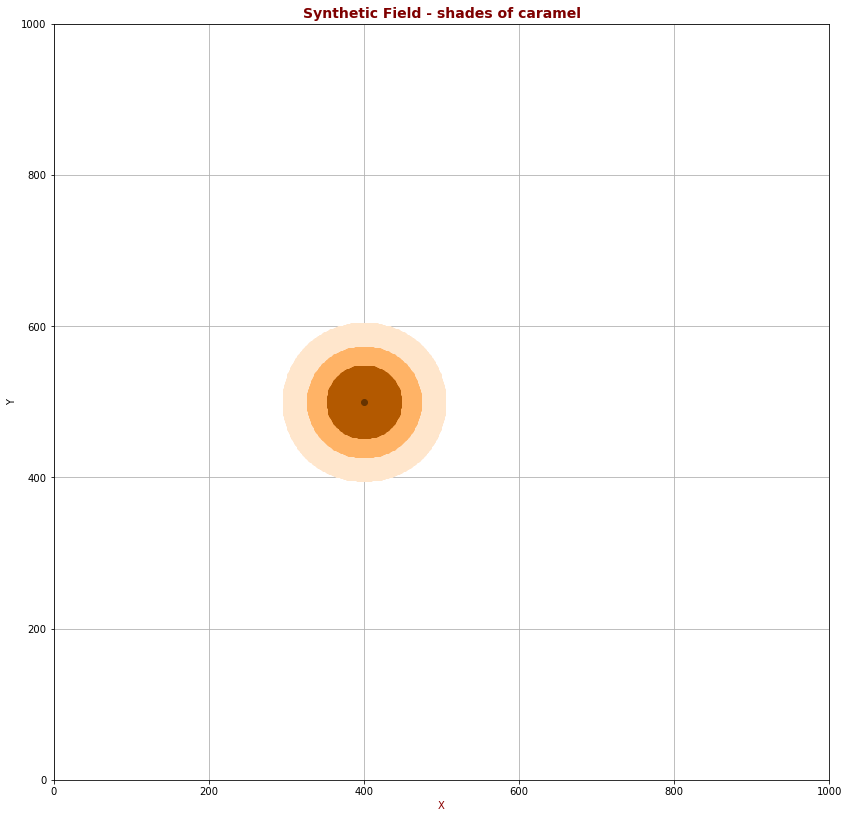

In [14]:
fig= VisualisetionOfSyntheticField(XxPollutionLo, YyPollutionLo, 
                                   XxPollutionMe, YyPollutionMe, 
                                   XxPollutionHi, YyPollutionHi)
fig.savefig('plot1.png')
fig.clf()

<div class="alert alert-success">
<b><u>ClearAllData</u></b><br>
Is a function, the function clears all vectors and matrix data.
</div>

In [15]:
# Deleting the rover track without pollution Arrays
def ClearAllData():
    XxPollutionLo.clear()
    YyPollutionLo.clear()
    XxPollutionMe.clear()
    YyPollutionMe.clear()
    XxPollutionHi.clear()
    YyPollutionHi.clear()
    FieldMatrix= None

In [16]:
ClearAllData()
gf.Print_1H('End')

ᐅ End 
